In [1]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from os import listdir
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt 
import pickle
import tensorflow as tf

In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

In [ ]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [ ]:
import GPUtil
GPUtil.getAvailable()

In [ ]:
nvgpu.available_gpus()

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

In [ ]:
print(tf.config.list_physical_devices())

In [2]:
# image parameters
img_width = 224
img_height = 224
num_channels = 3

In [3]:
# network architecture
vgg = VGG16(input_shape = (img_width, img_height, num_channels), include_top = False, pooling = 'avg')
# final layer would be a max pooling layer, we instead a single set of numbers to represent all of those features. Global average pooling will be applied to that final number, converting from many arrays to one array

In [4]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model = Model(inputs = vgg.input, outputs = vgg.layers[-1].output)

In [6]:
model.save('models/vgg16_search_engine.h5')

## Preprocessing and Featurizing Functions

In [7]:
# image preprocessing function

def preprocess_image(filepath):
    image = load_img(filepath, target_size = (img_width, img_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    return image 

In [8]:
# featurise image

def featurise_image(image):
    feature_vector = model.predict(image)
    
    return feature_vector

## Featurise base images

In [9]:
# source directory for base images

source_dir = 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/'


In [10]:
# empty objects to append to 

filename_store = []
feature_vector_store = np.empty((0, 512))

In [11]:
# pass in and featurise base image set

for image in listdir(source_dir):
  print(image)

  # append image filename for future lookup
  filename_store.append(source_dir + image)

  #preprocess the image
  preprocessed_image = preprocess_image(source_dir + image)

  # extract the feature vector 
  feature_vector = featurise_image(preprocessed_image)

  # append feature vector for similarity calculations
  feature_vector_store = np.append(feature_vector_store, feature_vector, axis = 0)

footwear_0000.jpg
1/1 [==============================] - 1s 684ms/step
footwear_0001.jpg
1/1 [==============================] - 0s 163ms/step
footwear_0002.jpg
1/1 [==============================] - 0s 152ms/step
footwear_0003.jpg
1/1 [==============================] - 0s 139ms/step
footwear_0004.jpg
1/1 [==============================] - 0s 155ms/step
footwear_0005.jpg
1/1 [==============================] - 0s 173ms/step
footwear_0006.jpg
1/1 [==============================] - 0s 168ms/step
footwear_0007.jpg
1/1 [==============================] - 0s 155ms/step
footwear_0008.jpg
1/1 [==============================] - 0s 145ms/step
footwear_0009.jpg
1/1 [==============================] - 0s 144ms/step
footwear_0010.jpg
1/1 [==============================] - 0s 156ms/step
footwear_0011.jpg
1/1 [==============================] - 0s 151ms/step
footwear_0012.jpg
1/1 [==============================] - 0s 149ms/step
footwear_0013.jpg
1/1 [==============================] - 0s 141ms/step
footwe

In [12]:
# save key objects for future use

pickle.dump(filename_store, open('models/filename_store.p', 'wb'))
pickle.dump(feature_vector_store, open('models/feature_vector_store.p', 'wb'))

## Pass in Image, and return similar images 

In [13]:
# load in required images

model = load_model('models/vgg16_search_engine.h5', compile = False)

# compiling a model is setting it up for training. Since we are not doing that, set it to False, hence avoiding a warning message. 

filename_store = pickle.load(open('models/filename_store.p', 'rb'))
feature_vector_store= pickle.load(open('models/feature_vector_store.p', 'rb'))

In [34]:
# search parameters
search_results_n = 8
search_image = "C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/search_image_02.jpg"

In [35]:
# preprocess and featurise search image

preprocessed_image = preprocess_image(search_image)
search_feature_vector = featurise_image(preprocessed_image)


OSError: [Errno 22] Invalid argument

In [20]:
# instantiate nearest neighbors logic 
# cosine distance measures the angle between any 2 vectors and whether the vectors are pointing in the same direction. 

image_neighbors = NearestNeighbors(n_neighbors = search_results_n, metric = 'cosine')


In [21]:
# apply to our feature vector store

image_neighbors.fit(feature_vector_store)

NearestNeighbors(metric='cosine', n_neighbors=8)

In [22]:
# return searcch results for search image (distance & indices)

image_distances, image_indices = image_neighbors.kneighbors(search_feature_vector)

In [23]:
image_distances

# in order of most similar to least similar

array([[0.10965962, 0.1557808 , 0.19218895, 0.2061388 , 0.21946175,
        0.23505597, 0.24443602, 0.25676831]])

In [24]:
image_indices

# same order to image_distances

array([[186, 230, 176, 228, 299, 259, 185, 266]], dtype=int64)

In [25]:
# convert closest imgae indices and distances to lists 
image_indices = list(image_indices[0])
image_distances = list(image_distances[0])

In [27]:
search_results_files = [filename_store[i] for i in image_indices]
search_results_files

['C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0187.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0231.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0176.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0229.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0301.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0261.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/Data Science Infinity/Deep Learning/Image Search Engine/data/footwear_0186.jpg',
 'C:/Users/ibobu/OneDrive/DataScience_MachineLearning/D

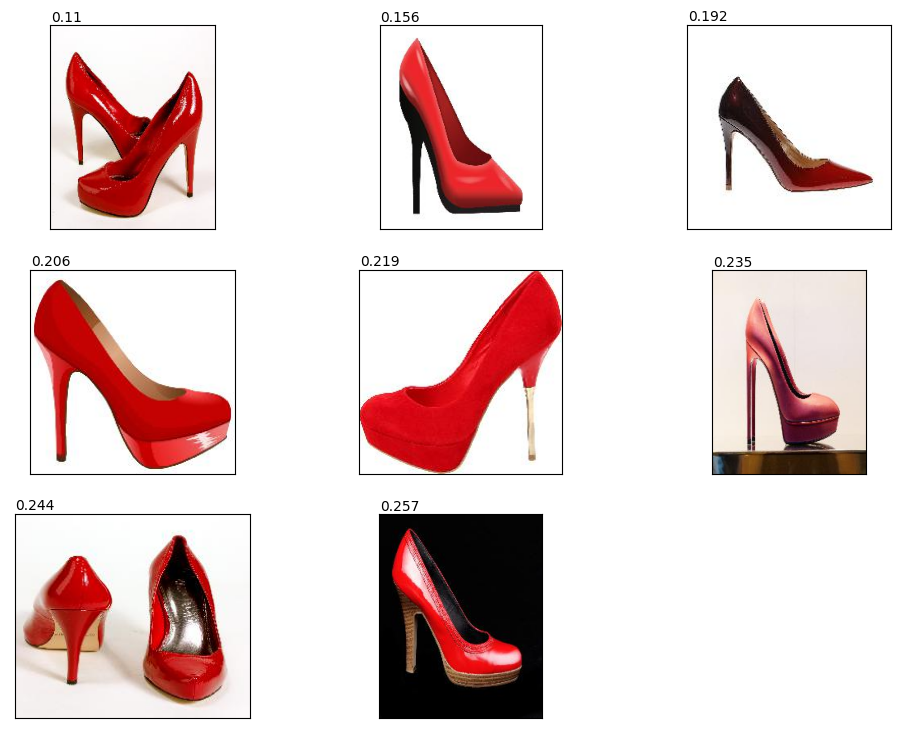

In [28]:
# plot results 

plt.figure(figsize=(12, 9))
for counter, result_file in enumerate(search_results_files):
    image = load_img(result_file)
    ax = plt.subplot(3,3, counter+1)
    plt.imshow(image)
    plt.text(0, -5, round(image_distances[counter], 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()